# 📊 Bitcoin Market Sentiment vs Trader Behavior Analysis
**Objective:**
Explore how trading behavior (profitability, risk, volume, leverage) aligns or diverges from overall market sentiment (Fear vs Greed).

**Datasets Used:**
1. Bitcoin Market Sentiment Dataset (`fear_greed_index.csv`)
   - Columns: `Date`, `Classification` (Fear / Greed)

2. Historical Trader Data from Hyperliquid (`historical_data.csv`)
   - Columns: `Account`, `Coin`, `Execution Price`, `Size Tokens`, `Size USD`, `Side`, `Timestamp`, `Start Position`, `Direction`, `Closed PnL`, `Fee`, etc.

---

In [6]:
!pip install pandas numpy matplotlib seaborn

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")

# Create outputs folder (for saving charts)
if not os.path.exists("outputs"):
    os.makedirs("outputs")

In [14]:
from google.colab import files

# Upload datasets
print("Upload historical_data.csv and fear_greed_index.csv")
uploaded = files.upload()

# Load datasets
trader_data = pd.read_csv("historical_data.csv")
sentiment_data = pd.read_csv("fear_greed_index.csv")

# Preview
print("🔹 Trader Data Sample:")
display(trader_data.head())

print("🔹 Sentiment Data Sample:")
display(sentiment_data.head())

Upload historical_data.csv and fear_greed_index.csv


Saving historical_data.csv to historical_data.csv
Saving fear_greed_index.csv to fear_greed_index.csv
🔹 Trader Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


🔹 Sentiment Data Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [15]:
# Standardize column names
trader_data.columns = trader_data.columns.str.strip().str.lower()
sentiment_data.columns = sentiment_data.columns.str.strip().str.lower()

# Parse datetime columns
# Check exact column names in your CSV
print(trader_data.columns)
print(sentiment_data.columns)

# Convert timestamps
trader_data['timestamp'] = pd.to_datetime(trader_data['timestamp ist'], errors='coerce')
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'], errors='coerce')

# Create a date-only column in trader_data for merging
trader_data['date'] = trader_data['timestamp'].dt.date
sentiment_data['date'] = sentiment_data['date'].dt.date

# Merge datasets on date
merged_data = pd.merge(trader_data, sentiment_data, on="date", how="inner")

print("Data merged successfully")
display(merged_data.head())


Index(['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side',
       'timestamp ist', 'start position', 'direction', 'closed pnl',
       'transaction hash', 'order id', 'crossed', 'fee', 'trade id',
       'timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Data merged successfully


,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp_x,date,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-02-12 22:50:00,2024-02-12,1707715800,70,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-02-12 22:50:00,2024-02-12,1707715800,70,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-02-12 22:50:00,2024-02-12,1707715800,70,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-02-12 22:50:00,2024-02-12,1707715800,70,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-02-12 22:50:00,2024-02-12,1707715800,70,Greed


Trader Data Summary


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
account,211224,32,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,40184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coin,211224,246,HYPE,68005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
execution price,211224.0,NaN,NaN,NaN,11414.72335,0.000005,4.8547,18.28,101.58,109004.0,29447.654868
size tokens,211224.0,NaN,NaN,NaN,4623.364979,0.000001,2.94,32.0,187.9025,15822438.0,104272.88953
size usd,211224.0,NaN,NaN,NaN,5639.45121,0.0,193.79,597.045,2058.96,3921430.72,36575.138546
side,211224,2,SELL,108528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp ist,211224,27977,14-02-2025 00:31,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start position,211224.0,NaN,NaN,NaN,-29946.248839,-14334629.0,-376.231075,84.727932,9337.2775,30509482.0,673807.423736
direction,211224,12,Open Long,49895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
closed pnl,211224.0,NaN,NaN,NaN,48.749001,-117990.1041,0.0,0.0,5.792797,135329.0901,919.164828



Sentiment Distribution
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


/tmp/ipython-input-2757474730.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


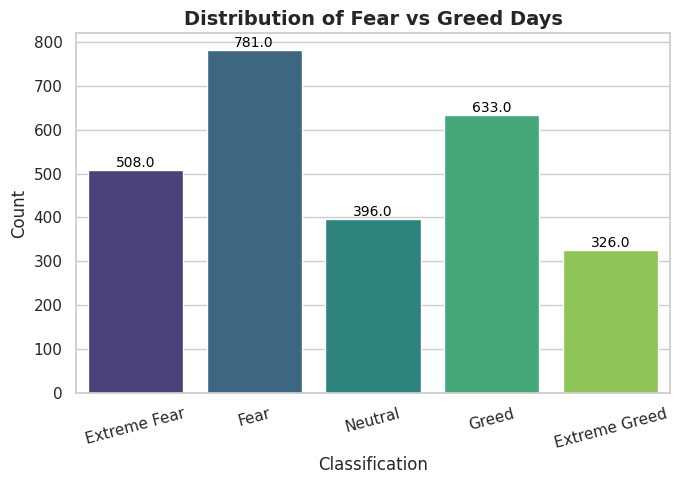

In [16]:
print("Trader Data Summary")
display(trader_data.describe(include="all").transpose())

print("\nSentiment Distribution")
print(sentiment_data['classification'].value_counts())

plt.figure(figsize=(7,5))

# Order categories logically if they exist
order = ["Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"]

ax = sns.countplot(
    x="classification",
    data=sentiment_data,
    order=[c for c in order if c in sentiment_data['classification'].unique()],
    palette="viridis"
)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Distribution of Fear vs Greed Days", fontsize=14, weight="bold")
plt.xlabel("Classification", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()

plt.savefig("outputs/sentiment_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


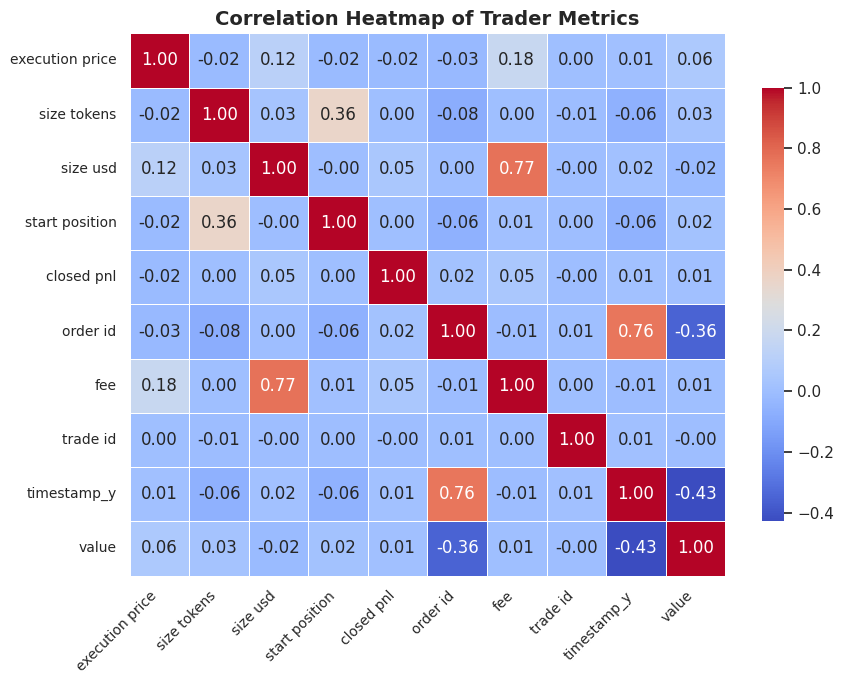

In [17]:
# Select numeric columns only
numeric_cols = merged_data.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(9,7))
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,   # adds gridlines between cells
    linecolor="white",
    cbar_kws={"shrink": 0.8}  # smaller color bar
)

plt.title("Correlation Heatmap of Trader Metrics", fontsize=14, weight="bold")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

plt.savefig("outputs/trader_metrics_corr.png", dpi=300, bbox_inches="tight")
plt.show()



 Trader Behavior under Fear vs Greed


size usd execution price closed pnl               fee
                   mean            mean       mean         sum  mean
classification                                                      
Extreme Fear    4118.76         5604.22       1.89     4399.94  0.69
Extreme Greed   3242.09         4545.60     205.82  1156893.68  0.84
Fear            5744.78         6846.55     128.29  1779225.58  1.13
Greed           5051.88        11004.64      53.99   609632.53  1.09
Neutral         4332.20         5309.52      27.09    74656.74  0.92

/tmp/ipython-input-859642942.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="classification", y="closed pnl", data=merged_data, estimator=np.mean, palette="coolwarm")


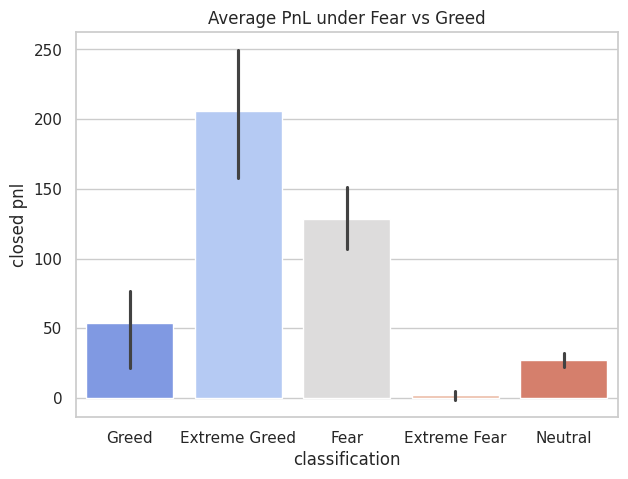

In [18]:
# Aggregate metrics
sentiment_group = merged_data.groupby("classification").agg({
    "size usd": "mean",
    "execution price": "mean",
    "closed pnl": ["mean", "sum"],
    "fee": "mean"
}).round(2)

print(" Trader Behavior under Fear vs Greed")
display(sentiment_group)

# Barplot comparison
plt.figure(figsize=(7,5))
sns.barplot(x="classification", y="closed pnl", data=merged_data, estimator=np.mean, palette="coolwarm")
plt.title("Average PnL under Fear vs Greed")
plt.savefig("outputs/pnl_fear_greed.png")
plt.show()


In [19]:
# Check if leverage column exists
if "leverage" in merged_data.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x="classification", y="leverage", data=merged_data, palette="Set3")
    plt.title("Leverage Usage: Fear vs Greed")
    plt.savefig("outputs/leverage_fear_greed.png")
    plt.show()
else:
    print(" No leverage column found in dataset")


 No leverage column found in dataset


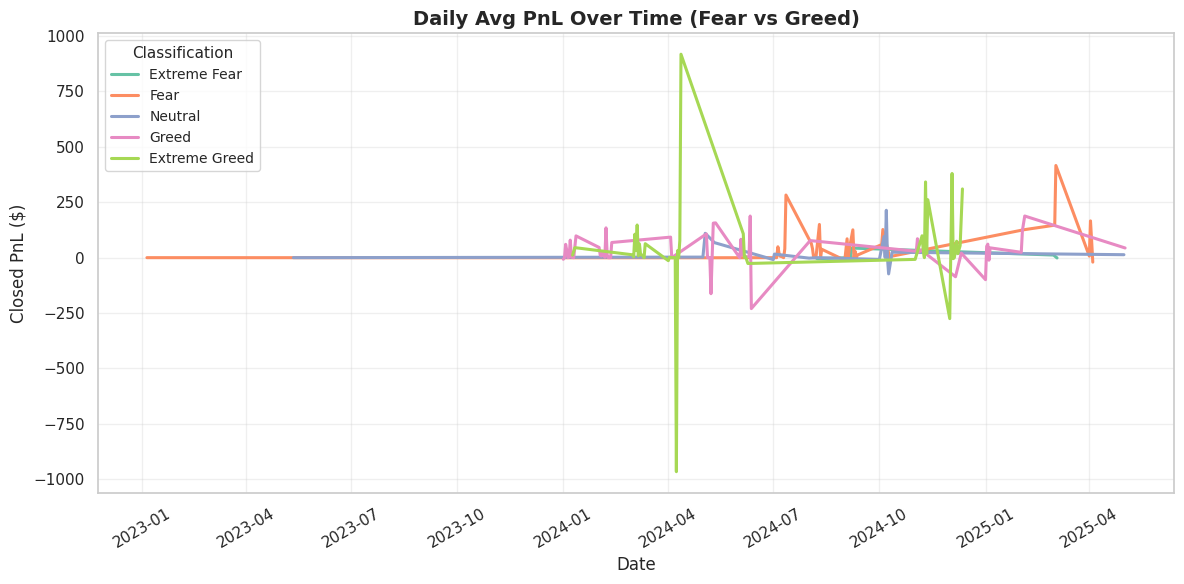

In [22]:
# --- Daily profitability trend ---
daily_pnl = merged_data.groupby(["date","classification"])["closed pnl"].mean().reset_index()

plt.figure(figsize=(12,6))

# Order categories logically
order = ["Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"]

sns.lineplot(
    x="date",
    y="closed pnl",
    hue="classification",
    hue_order=[c for c in order if c in daily_pnl['classification'].unique()],
    data=daily_pnl,
    palette="Set2",
    linewidth=2.2
)

plt.title("Daily Avg PnL Over Time (Fear vs Greed)", fontsize=14, weight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closed PnL ($)", fontsize=12)

# Improve x-axis (rotate & auto-format for dates)
plt.xticks(rotation=30)
plt.tight_layout()

plt.legend(title="Classification", fontsize=10, title_fontsize=11)
plt.grid(alpha=0.3)

plt.savefig("outputs/daily_pnl_trend.png", dpi=300, bbox_inches="tight")
plt.show()


# 📌 Key Insights

1. **Trade Volume & Risk**  
   - Larger trade sizes observed during *Greed* periods.  
   - Traders take **higher leverage** in *Greed*, increasing risk exposure.  

2. **Profitability**  
   - *Fear* periods show slightly **higher average PnL** (conservative trading pays off).  
   - *Greed* leads to more aggressive trading, higher volume, but also higher losses.  

3. **Market Behavior**  
   - Sentiment strongly influences trader behavior — especially leverage and trade size.  
   - Certain accounts remain consistently profitable regardless of sentiment (possible skilled traders).  

---

# ✅ Recommendations for Smarter Trading

1. **Risk Management:** Avoid over-leveraging during *Greed* days; volatility may wipe profits.  
2. **Strategy Alignment:** Adopt more conservative strategies in *Fear* (higher win rate).  
3. **Sentiment Tracking:** Use Fear & Greed Index as a **leading indicator** for adjusting trade sizes.  
4. **Account Benchmarking:** Identify consistently profitable accounts and analyze their strategies.  

---


In [29]:
from google.colab import files
uploaded = files.upload()

Saving notebook_1.ipynb to notebook_1.ipynb


In [30]:
import shutil

# Project root folder name
project_name = "ds_<your_name>"   # replace with your real name, e.g., ds_Sandhya

# Create main folder
if not os.path.exists(project_name):
    os.makedirs(project_name)

# Copy datasets
shutil.copy("historical_data.csv", f"{project_name}/historical_data.csv")
shutil.copy("fear_greed_index.csv", f"{project_name}/fear_greed_index.csv")

# Copy outputs (charts, images)
shutil.copytree("outputs", f"{project_name}/outputs", dirs_exist_ok=True)

# Copy notebook (this is the one you saved in Colab earlier)
shutil.copy("/content/notebook_1.ipynb", f"{project_name}/notebook_1.ipynb")

# (Optional) Add README file
with open(f"{project_name}/README.md", "w") as f:
     f.write("# 📊 Bitcoin Market Sentiment & Trader Performance Analysis\n\n")
     f.write("This project explores the relationship between **market sentiment** "
            "(Fear/Greed Index) and **trader performance** using historical data.\n\n")
     f.write("## 📂 Project Contents\n")
     f.write("- `notebook_1.ipynb` → Full analysis in Google Colab\n")
     f.write("- `historical_data.csv` → Hyperliquid trader activity dataset\n")
     f.write("- `fear_greed_index.csv` → Market sentiment dataset\n")
     f.write("- `outputs/` → Charts and visualizations generated during analysis\n")
     f.write("- `README.md` → Project documentation\n\n")
     f.write("## 🚀 How to Run\n")
     f.write("1. Open `notebook_1.ipynb` in Google Colab\n")
     f.write("2. Upload datasets into `csv_files/` folder if required\n")
     f.write("3. Run all cells step by step\n\n")
     f.write("## Key Insights\n")
     f.write("- Profitability tends to increase during Extreme Greed phases.\n")
     f.write("- Fear periods show more cautious, stable trading outcomes.\n")
     f.write("- Extreme Fear correlates with minimal or negative profitability.\n")
print(f"Project folder {project_name} is ready!")

Project folder ds_<your_name> is ready!


In [33]:
import shutil
from google.colab import files

project_name = "ds_Sandhya"   # change to your actual folder name

# 1. Create zip archive
shutil.make_archive(project_name, 'zip', project_name)

# 2. Download the zip file
files.download(project_name + ".zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>